# Исследование для маркетингового отдела интернет-магазина "Стримчик" 

**Цель проекта**: провести исследовательский анализ данных об играх и их продажах до 2016 года, чтобы спрогнозировать продажи на 2017 год для успешного проведения рекламной кампании. 

А также, проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные


**Описание данных**:
- ``Name`` — название игры
- ``Platform`` — платформа
- ``Year_of_Release`` — год выпуска
- ``Genre`` — жанр игры
- ``NA_sales`` — продажи в Северной Америке (миллионы проданных копий)
- ``EU_sales`` — продажи в Европе (миллионы проданных копий)
- ``JP_sales`` — продажи в Японии (миллионы проданных копий)
- ``Other_sales`` — продажи в других странах (миллионы проданных копий)
- ``Critic_Score`` — оценка критиков (максимум 100)
- ``User_Score`` — оценка пользователей (максимум 10)
- ``Rating`` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла с данными и изучение общей информации

In [1]:
# Импортируем библиотеки и настраиваем параметры
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Сохраняем датасет в переменную
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# Просматриваем датасет
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получаем общую информацию об исходных данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод 

Сохранил датафрейм с данными об играх. В данных были обнаружены следующие проблемы:
- Названия столбцов в неудобном регистре
- Неправильные типы данных
- Пропуски в данных

## Предобработка данных

Приведем названия столбцов к нижнему регистру для удобства

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изменим тип данных в столбце ```user_score``` на численный, чтобы иметь возможность совершать с ним математические операции

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
data['user_score'] = pd.to_numeric(data.user_score, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Удалим строки пропусками в столбцах c годом выхода игр и жанром, потому что они мешают нашему исследованию. В столбцах с оценками игр и рейтингом ESRB пропуски оставим, тк их удаление сильно скажется на достоверности исследования из-за их объема. Пропуски могли образоваться из-за влияния человеческого фактора, технических ошибок, или, как в случае с пропусками в столбце с рейтингом ESRB - потому что система вышла позже, чем игра, а так же, издатели игр на определенные платформы не используют рейтинговую систему ESRB.

In [9]:
# Создаем переменную raw_data, чтобы после обработки пропусков узнать какую часть данных мы удалили
raw_data = data

In [10]:
raw_data.year_of_release.isna().sum()

269

In [11]:
raw_data.genre.isna().sum()

2

In [12]:
raw_data = data.dropna(subset=['year_of_release', 'genre'])
raw_data.year_of_release.isna().sum()

0

In [13]:
1 - raw_data.shape[0]/data.shape[0]

0.016212982351181626

Потеряли чуть меньше 2% данных, что не должно сильно сказаться на результатах исследования. 

In [14]:
# Применяем наши изменения к датафрейму
data = raw_data

Изменим тип данных в столбце ```year_of_release``` на целочисленный

In [15]:
data.year_of_release = data.year_of_release.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Создадим новый столбец ```summary_sales``` с суммарными продажами игр во всех регионах

In [16]:
data['summary_sales'] = data[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Проверим наши данные на дубликаты

In [17]:
data.duplicated().sum()

0

Полностью повторяющихся строк нет

In [18]:
data.duplicated(subset=['name','platform','year_of_release']).sum()

1

Проверим комбинацию Название-Платформа-Год выпуска

In [19]:
data.loc[data.duplicated(subset=['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [20]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Есть полностью повторяющаяся комбинация Название-Платформа-Год выпуска, удалим ее, оставив первое значение.

In [21]:
data.drop_duplicates(subset=['name','platform','year_of_release'], keep='first', inplace=True)
data.duplicated(subset=['name','platform','year_of_release']).sum()

0

Проверим комбинацию Название-Платформа

In [22]:
data.duplicated(subset=['name','platform']).sum()

2

In [23]:
data.loc[data.duplicated(subset=['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08


In [24]:
data.query('name == "Need for Speed: Most Wanted" and (platform == "X360" or platform == "PC")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


По информации из интернета - Need for Speed: Most Wanted 2012года - ремейк одноименной игры 2005 года, так что это не дубликат.

После наших правок - обновим индексы

In [25]:
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  summary_sales    16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


### Вывод 
В результате предобработки данных:
- Изменены названия столбцов
- Изменены типы данных в столбцах
- Обработаны пропуски
- Добавлен столбец с суммарными продажами игр во всех регионах
- Удалены дубликаты

## Исследовательский анализ данных 

### Cколько игр выпускалось в разные годы

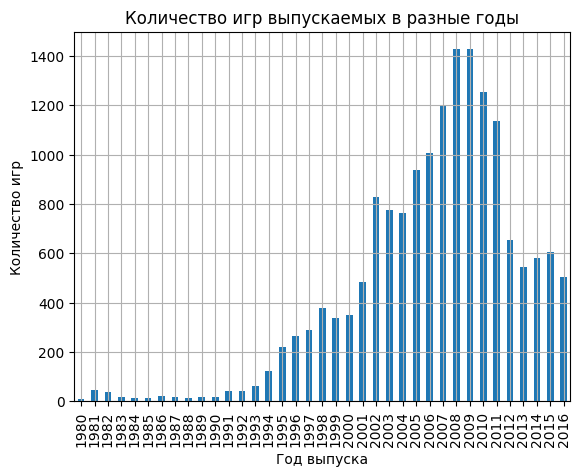

In [26]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    kind='bar',
    grid=True,
    title='Количество игр выпускаемых в разные годы',
    xlabel='Год выпуска',
    ylabel='Количество игр',
    legend=None)
plt.show()

В 1994 году видно начало резкого роста количества выпускаемых игр, который закончился в 2008 году и пошел на спад.

### Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы.

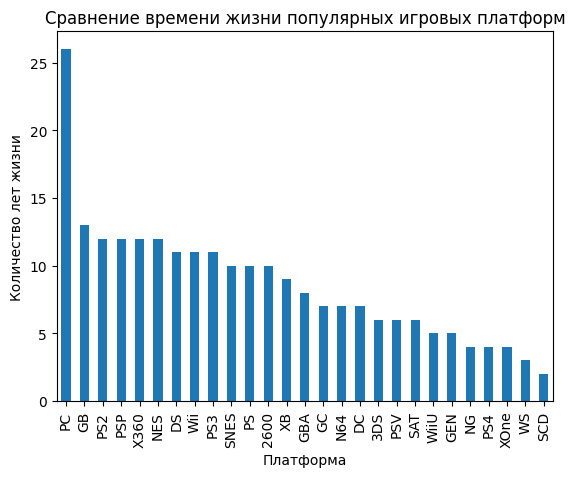

'Среднее время жизни игровой платформы: 8 лет'

In [27]:
# Создаем сводную таблицу с актуальными платформами
data_p_actual = data.pivot_table(
    index='platform', values='summary_sales',
    aggfunc='sum').sort_values(by='summary_sales',
                               ascending=False).query('summary_sales > 1')

# Создаем таблицу с временем жизни платформы
platform_lifetime = pd.DataFrame(columns=['platform', 'lifetime'])
platform_lifetime.platform = data_p_actual.index
for p in platform_lifetime.platform:
    platform_lifetime.loc[platform_lifetime['platform'] == p,
                          'lifetime'] = len(
                              data.loc[data.platform == p,
                                       'year_of_release'].unique())
    
# Рисуем график
platform_lifetime.sort_values(by='lifetime', ascending=False).plot(
    kind='bar',
    x='platform',
    legend=None,
    title='Сравнение времени жизни популярных игровых платформ',
    xlabel='Платформа',
    ylabel='Количество лет жизни')
plt.show()

# Считаем среднее время жизни игровой платформы
f'Среднее время жизни игровой платформы: {int(platform_lifetime.lifetime.median())} лет'

На графике видно одного долгожителя под названием PC, который остается актуальной игровой платформой на протяжении 26 лет. Среднее время жизни одной игровой платформы - 8 лет.

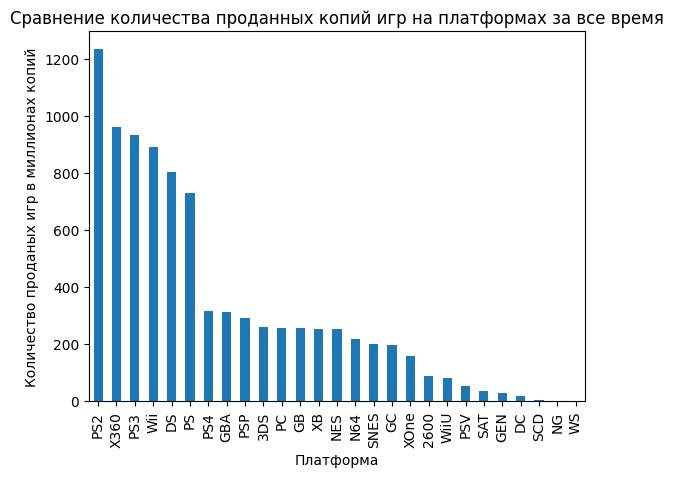

In [28]:
data_p_actual.plot(
    kind='bar',
    title='Сравнение количества проданных копий игр на платформах за все время',
    xlabel='Платформа',
    ylabel='Количество проданых игр в миллионах копий',
    legend=None)
plt.show()

PS2, Xbox 360, PS3, Wii, DS, PS самые популярные игровые платформы за все время.

Построим график с динамикой продаж игр на разных платформах в разбивке по годам. Возьмем период с 2009 года, когда начался спад количества выпускаемых игр.

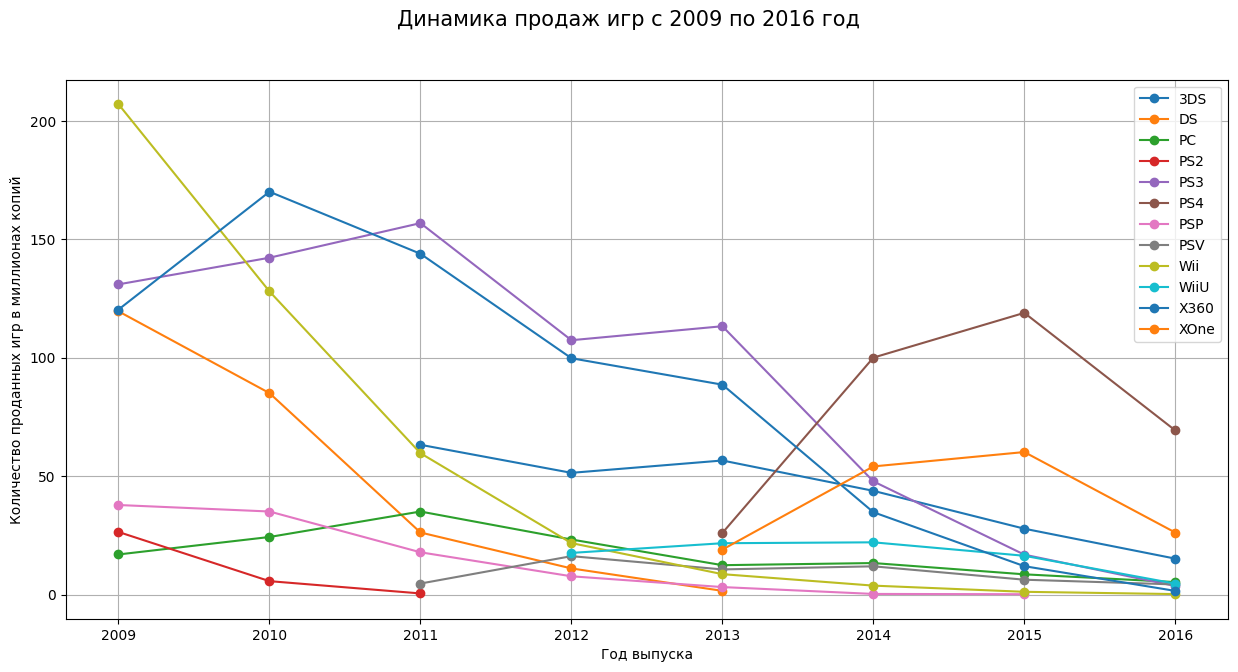

In [29]:
data_py_grouped = data.query('year_of_release >= 2009').pivot_table(index='platform',
                                          columns='year_of_release',
                                          values='summary_sales',
                                          aggfunc='sum')

fig, ax = plt.subplots(figsize=(15, 7))
for p in data_py_grouped.index:
    data_py_grouped.loc[p].plot(
        x='year_of_release',
        y='summary_sales',
        ax=ax,
        legend=True,
        grid=True,
        style='o-',
        xlabel='Год выпуска',
        ylabel='Количество проданных игр в миллионах копий')
plt.suptitle('Динамика продаж игр с 2009 по 2016 год', fontsize=15)
plt.show()

В 2013ом году появились новые игровые платформы(PS4 и XOne), прибыль которых на графике видна начиная с 2014года. Данные платформы по сей день сохраняют лидерство в количестве проданных игр в год. Так как среднее время жизни игровой платформы - 8 лет, в 2017 году эти игровые платформы так же будут являться лидерами продаж.

### Выбор актуального периода данных для исследования

Для дальнейшего исследования оставим данные в промежутке с 2014 по 2016 год.

In [30]:
good_data = data.query('year_of_release >= 2014').reset_index(drop=True)
good_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Гистограмма распределения по глобальным продажам игр в разбивке по платформам

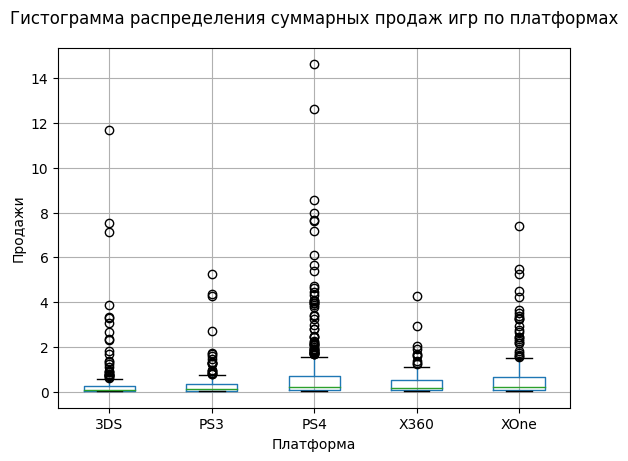

In [31]:
games = good_data.pivot_table(index=['name', 'platform'],
                              values='summary_sales',
                              aggfunc='sum').reset_index()
top_5_platforms = games.pivot_table(index='platform',
                                    values='summary_sales',
                                    aggfunc='sum').sort_values(
                                        by='summary_sales',
                                        ascending=False).head()
fig, ax = plt.subplots()
games.query('platform in @top_5_platforms.index').boxplot(
    column='summary_sales', by='platform', ax=ax)
fig.suptitle('Гистограмма распределения суммарных продаж игр по платформах')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')
ax.set_title(None)
plt.show()

У каждой платформы есть свои гиганты, приносящие большую часть прибыли.

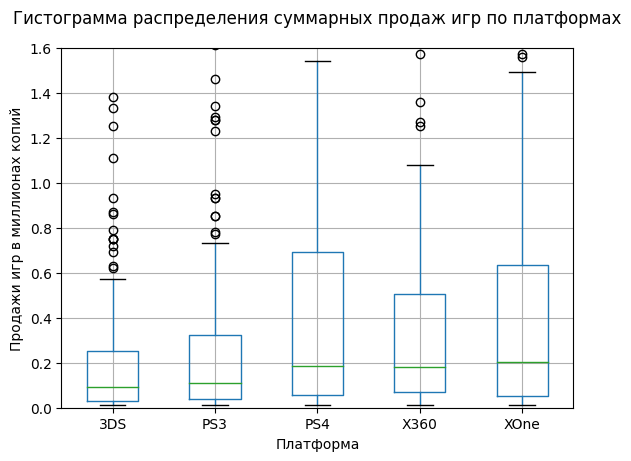

In [32]:
fig, ax = plt.subplots()
games.query('platform in @top_5_platforms.index').boxplot(column='summary_sales', by='platform', ax=ax)
fig.suptitle('Гистограмма распределения суммарных продаж игр по платформах')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи игр в миллионах копий')
ax.set_title(None)
ax.set_ylim(0, 1.6)
plt.show()

Если не смотреть на гигантов, то в среднем одна игра продается не больше, чем в 200 тысяч копий.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Рассмотрим влияние отзывов пользователей и критиков на продажи игр внутри платформы Xbox One.

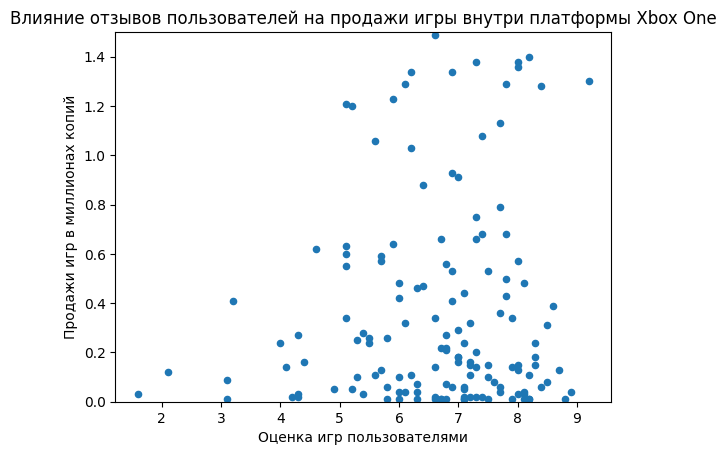

Коэффициент корреляции равен: -0.07038392806475809


In [33]:
good_data.query('platform == "XOne"').plot(
    x='user_score',
    y='summary_sales',
    kind='scatter',
    style='o',
    ylim=(0, 1.5),
    title='Влияние отзывов пользователей на продажи игры внутри платформы Xbox One',
    ylabel='Продажи игр в миллионах копий',
    xlabel='Оценка игр пользователями')
plt.show()
print(
    'Коэффициент корреляции равен:',
    good_data.query('platform == "XOne"')['user_score'].corr(
        good_data.query('platform == "XOne"')['summary_sales']))

Отзывы пользователей очень слабо влияют на продажи игры.

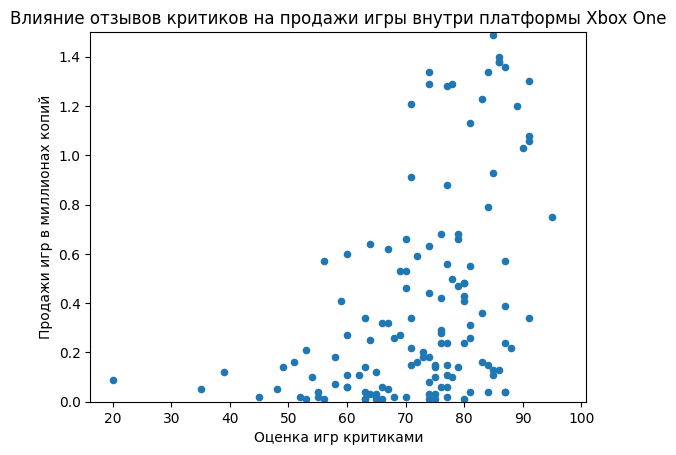

Коэффициент корреляции равен: 0.42867694370333187


In [34]:
good_data.query('platform == "XOne"').plot(
    x='critic_score',
    y='summary_sales',
    kind='scatter',
    style='o',
    ylim=(0, 1.5),
    title='Влияние отзывов критиков на продажи игры внутри платформы Xbox One',
    ylabel='Продажи игр в миллионах копий',
    xlabel='Оценка игр критиками')
plt.show()
print(
    'Коэффициент корреляции равен:',
    good_data.query('platform == "XOne"')['critic_score'].corr(
        good_data.query('platform == "XOne"')['summary_sales']))

Отзывы критиков умеренно влияют на продажи игры.

### Распределение игр по жанрам и самые продающиеся жанры

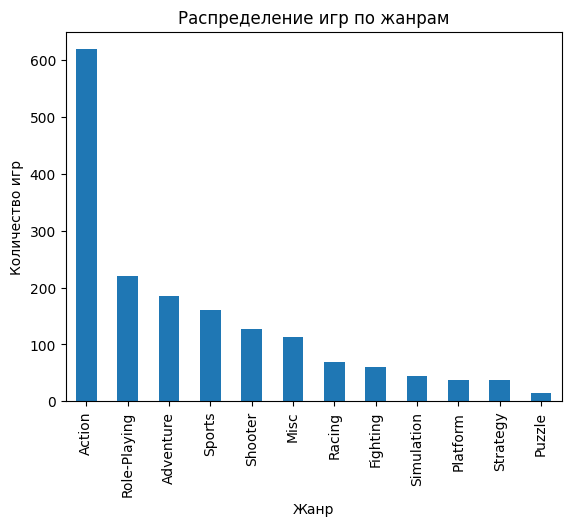

In [35]:
good_data.pivot_table(
    index='genre', values='name', aggfunc='count').sort_values(
        by='name', ascending=False).plot(kind='bar',
                                         legend=None,
                                         ylabel='Количество игр',
                                         xlabel='Жанр',
                                         title='Распределение игр по жанрам')
plt.show()

Чаще всего выпускают игры жанра Action.

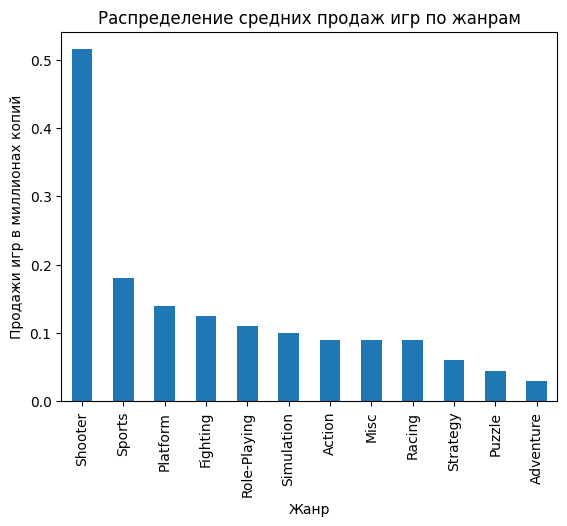

In [36]:
good_data.pivot_table(index='genre', values='summary_sales',
                      aggfunc='median').sort_values(
                          by='summary_sales', ascending=False).plot(
                              kind='bar',
                              legend=None,
                              ylabel='Продажи игр в миллионах копий',
                              xlabel='Жанр',
                              title='Распределение средних продаж игр по жанрам')
plt.show()

Самый продающийся жанр - Shooter. Среднее количество продаж игр жанра Shooter сильно выделятся на фоне остальных жанров.

### Вывод 
Провели исследовательский анализ данных и выяснили, что:
- В 1994 году видно начало резкого роста количества выпускаемых игр, который закончился в 2008 году и пошел на спад.
- Самая долгоживущая игровая платформа - PC, которая уже 26 лет сохраняет свою актуальность. Среднее время жизни одной игровой платформы - 8 лет.
- Для дальнейшего исследования стоит оставить данные в промежутке с 2014 по 2016 год. Тк только в этом промежутке становятся видны реальные продажи новых актуальных игровых платформ.
- У каждой платформы есть свои гиганты, приносящие большую часть прибыли. А если их не учитывать - то, в среднем одна игра продается не больше, чем в 200 тысяч копий.
- Отзывы пользователей очень слабо влияют на продажи игры, а отзывы критиков умеренно влияют на продажи игры.
- Чаще всего выпускают игры жанра Action, а лучше всего продаются жанры - Action, Shooter, Sports и Role-Playing.

## Предпочтения игроков каждого региона по платформам и жанрам игр

### По платформам

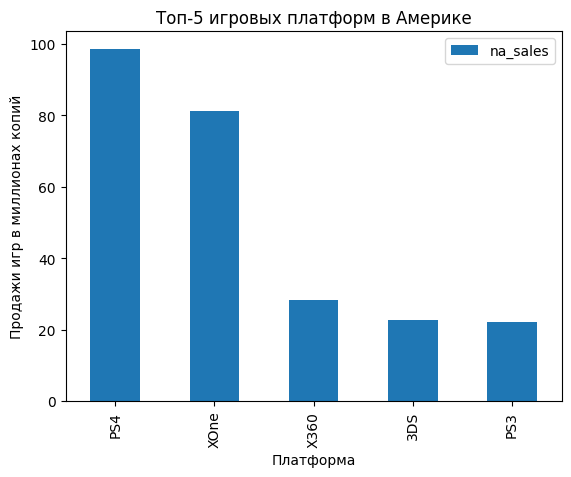

In [37]:
good_data.pivot_table(index='platform', values='na_sales',
                      aggfunc='sum').sort_values(
                          by='na_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых платформ в Америке',
                              xlabel='Платформа',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

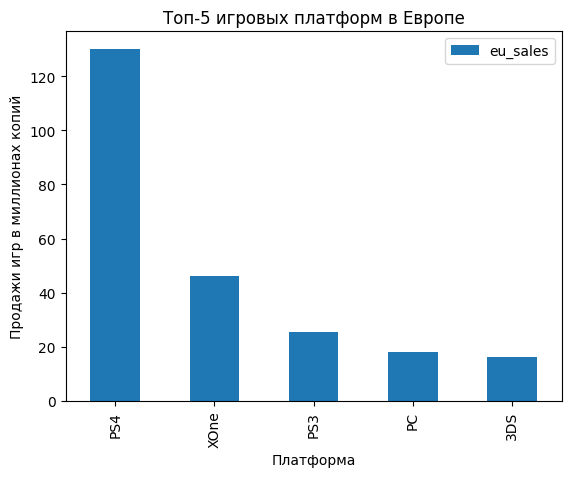

In [38]:
good_data.pivot_table(index='platform', values='eu_sales',
                      aggfunc='sum').sort_values(
                          by='eu_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых платформ в Европе',
                              xlabel='Платформа',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

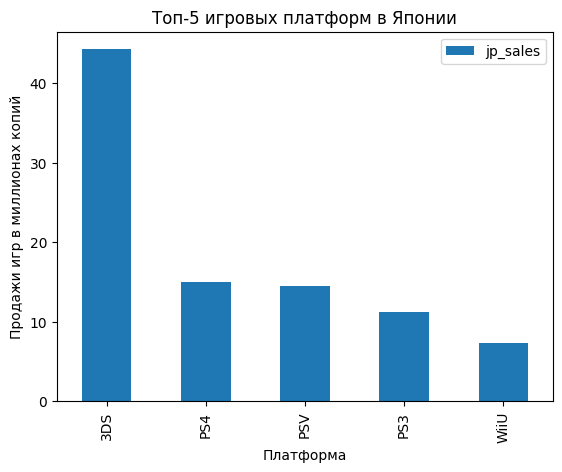

In [39]:
good_data.pivot_table(index='platform', values='jp_sales',
                      aggfunc='sum').sort_values(
                          by='jp_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых платформ в Японии',
                              xlabel='Платформа',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

#### Вывод
- Самые популярные игровые платформы в Америке - PS4, Xbox One, Xbox 360, 3DS и PS3. PS4 и Xbox one сильно выделяются на фоне остальных платформ в этом регионе.
- В Европе самые популярные платформы - PS4, Xbox One, PS3, PC и 3DS. Здесь PS4 имеет сильный отрыв от Xbox One. Так же в Европе популярен PC, чего нельзя сказать об Америке.
- В Японии большинство геймеров предпочитают отечественную платформу 3DS. Менее популярны, но все еще предпочтительны - PS4, PSV, PS3 и WiiU. Играть на Xbox японцы любят гораздо меньше, чем остальные регионы. А, возможно, это связано с тем, что они предпочитают консоли отечественного производства.

### По жанрам

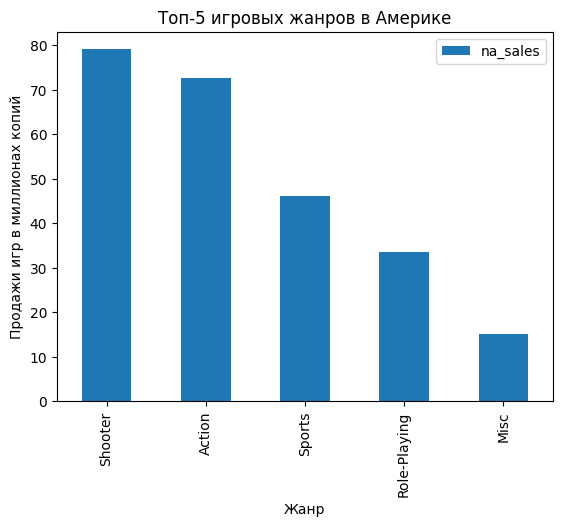

In [40]:
good_data.pivot_table(index='genre', values='na_sales',
                      aggfunc='sum').sort_values(
                          by='na_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых жанров в Америке',
                              xlabel='Жанр',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

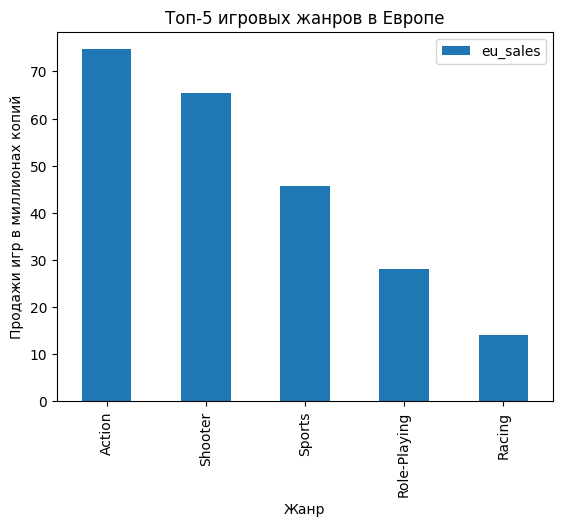

In [41]:
good_data.pivot_table(index='genre', values='eu_sales',
                      aggfunc='sum').sort_values(
                          by='eu_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых жанров в Европе',
                              xlabel='Жанр',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

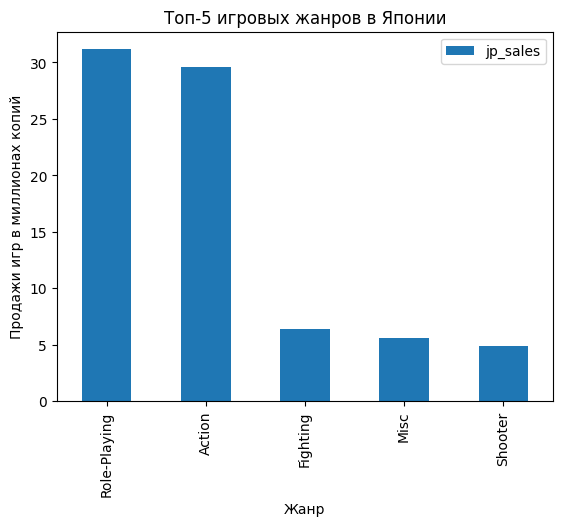

In [42]:
good_data.pivot_table(index='genre', values='jp_sales',
                      aggfunc='sum').sort_values(
                          by='jp_sales', ascending=False).head().plot(
                              kind='bar',
                              title='Топ-5 игровых жанров в Японии',
                              xlabel='Жанр',
                              ylabel='Продажи игр в миллионах копий')
plt.show()

#### Вывод
- Самые популярные жанры в Америке - Shooter, Action, Sports, Role-Playing и "Другие".
- В Европе схожая ситуация - Action, Shooter, Sports, Role-Playing и Racing. Action игры в Европе любят чуть больше, чем Shooter'ы, в отличии от Америки. Так же в Европе игроки любят погонять и предпочитают жанр Racing.
- В Японии иная ситуация - Role-Playing, Action, Fighting, "Другие" и Shooter. Превалирующее большинство японских геймеров любит Role-Playing и Action игры. Так же, в отличии от Европы и Америки в топ-5 жанров входит Fighting.

### Влияние рейтинга ESRB на продажи в отдельном регионе

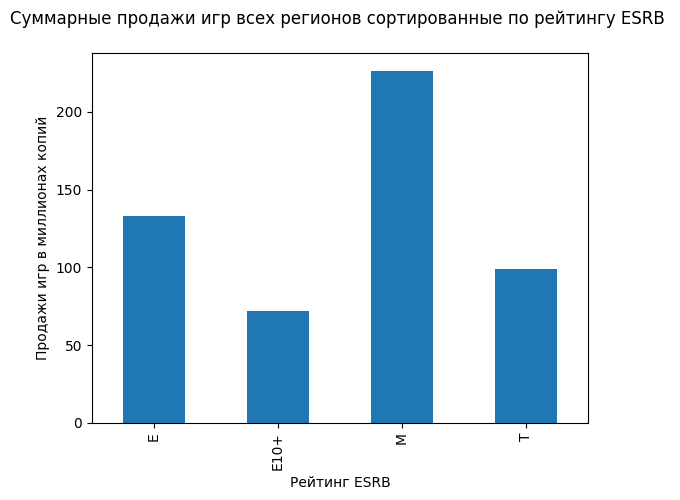

In [43]:
good_data.pivot_table(index='rating', values='summary_sales', aggfunc='sum').plot(
    kind='bar',
    title='Суммарные продажи игр всех регионов сортированные по рейтингу ESRB \n ',
    xlabel='Рейтинг ESRB',
    ylabel='Продажи игр в миллионах копий',
    legend=None)
plt.show()

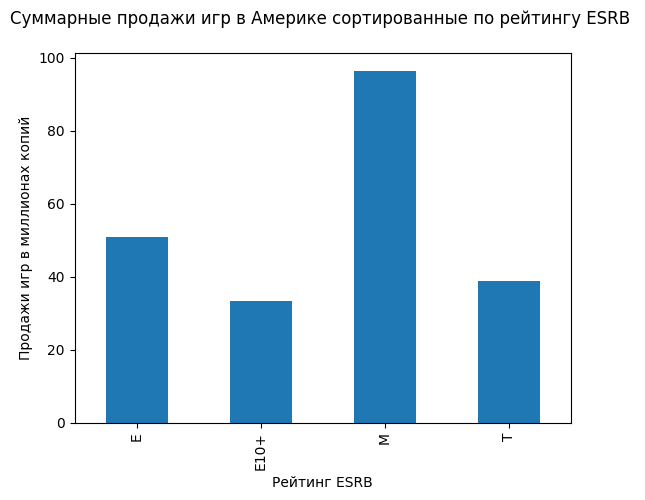

In [44]:
_ = good_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
_.plot(
    kind='bar',
    title='Суммарные продажи игр в Америке сортированные по рейтингу ESRB \n ',
    xlabel='Рейтинг ESRB',
    ylabel='Продажи игр в миллионах копий',
    legend=None)
plt.show()

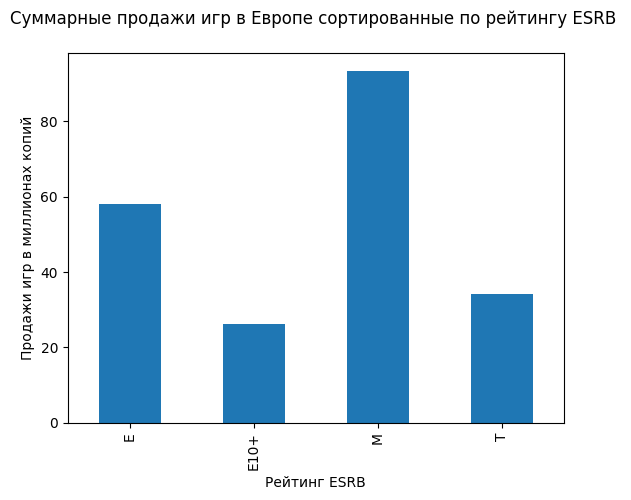

In [45]:
good_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(
    kind='bar',
    title='Суммарные продажи игр в Европе сортированные по рейтингу ESRB \n ',
    xlabel='Рейтинг ESRB',
    ylabel='Продажи игр в миллионах копий',
    legend=None)
plt.show()

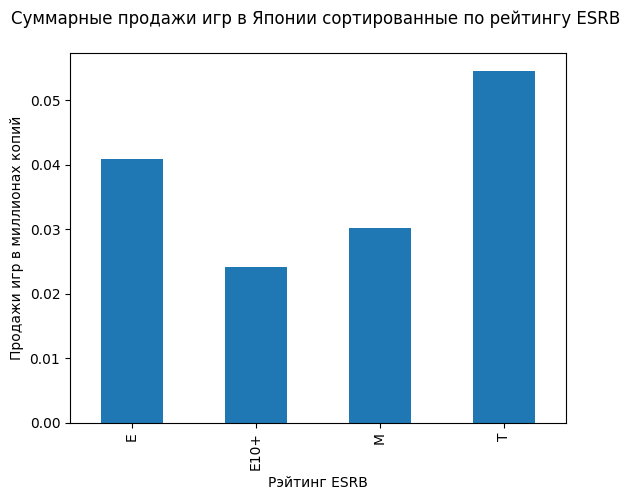

In [46]:
good_data.pivot_table(index='rating', values='jp_sales').plot(
    kind='bar',
    title='Суммарные продажи игр в Японии сортированные по рейтингу ESRB \n ',
    xlabel='Рэйтинг ESRB',
    ylabel='Продажи игр в миллионах копий',
    legend=None)
plt.show()

#### Вывод
- Во всем мире большинство продающихся игр имеют рейтинг "Для взрослых"(M), на втором месте игры "для всех", на третьем - игры "для подростков"(T), на четвертом - "Для всех от 10 лет и старше"(E10+). Если рассматривать отдельно Америку и Европу - ситуация остается такой же.
- В Японии ситуацию невозможно оценить по рейтингу ESRB, из-за крайне маленького количества продаж игр оцененных ESRB. Скорее всего в их отечественных платформах, которые они предпочитают больше остальных, используются другие системы рейтингов.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - средние пользовательский рейтинги платформ Xbox One и PC одинаковые, а альтернативная - средние пользовательский рейтинги платформ Xbox One и PC не одинаковые.

In [47]:
xone_user_score = good_data.query('platform == "XOne"').user_score.dropna()
pc_user_score = good_data.query('platform == "PC"').user_score.dropna()
alpha = 0.05
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False, alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.11601398086668835
Нет оснований отвергнуть нулевую гипотезу


Нулевая гипотеза в результате проверки не была отвергнута, а значит что для нашей выборки можно полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые, а альтернативная - средние пользовательские рейтинги жанров Action и Sports разные.

In [48]:
action_user_score = good_data.query('genre == "Action"').user_score.dropna()
sports_user_score = good_data.query('genre == "Sports"').user_score.dropna()
alpha = 0.05
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False, alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В результате проверки нулевая гипотеза была отвергнута в пользу альтернативной. Значит, средние рейтинги жанров Action и Sports разные.

## Общий вывод
В исходных данных обнаружил следующие проблемы: названия столбцов в неудобном регистре, неправильные типы данных, пропуски в данных, дубликаты.

Провел предобработку данных, в которой исправил вышеуказанные проблемы, а так же добавил новый столбец с суммарными продажами игр во всех регионах.

Провел исследовательский анализ данных и выяснил, что:
- В 1994 году видно начало резкого роста количества выпускаемых игр, который закончился в 2008 году и пошел на спад.
- Среднее время жизни одной игровой платформы - 8 лет.
- Для дальнейшего исследования стоит оставить данные в промежутке с 2014 по 2016 год. Тк только в этом промежутке становятся видны реальные продажи новых актуальных игровых платформ.
- У каждой платформы есть гиганты, приносящие большую часть прибыли. А если их не учитывать - то, в среднем одна игра продается не больше, чем в 200 тысяч копий.
- Отзывы пользователей очень слабо влияют на продажи игры, а отзывы критиков умеренно влияют на продажи игры.
- Чаще всего выпускают игры жанра Action, а самый продающийся жанр - Shooter. Среднее количество продаж игр жанра Shooter сильно выделятся на фоне остальных жанров.

Составил портрет игроков разных регионов по предпочитаемым платформам:
- Самые популярные игровые платформы в Америке - PS4, Xbox One, Xbox 360, 3DS и PS3. PS4 и Xbox one сильно выделяются на фоне остальных платформ в этом регионе.
- В Европе самые популярные платформы - PS4, Xbox One, PS3, PC и 3DS. Здесь PS4 имеет сильный отрыв от Xbox One. Также в Европе популярен PC, чего нельзя сказать об Америке.
- В Японии большинство геймеров предпочитают отечественную платформу 3DS. Менее популярны, но все еще предпочтительны - PS4, PSV, PS3 и WiiU. Играть на Xbox японцы любят гораздо меньше, чем остальные регионы. А, возможно, это связано с тем, что они предпочитают консоли отечественного производства.

Составил портрет игроков разных регионов по игровым жанрам:
- Самые популярные жанры в Америке - Shooter, Action, Sports, Role-Playing и "Другие".
- В Европе схожая ситуация - Action, Shooter, Sports, Role-Playing и Racing. Action игры в Европе любят чуть больше, чем Shooter'ы, в отличии от Америки. Так же в Европе игроки любят погонять и предпочитают жанр Racing.
- В Японии иная ситуация - Role-Playing, Action, Fighting, "Другие" и Shooter. Превалирующее большинство японских геймеров любит Role-Playing и Action игры. Так же, в отличии от Европы и Америки в топ-5 жанров входит Fighting.

Узнал как влияет рейтинг ESRB на продажи в отдельном регионе:
- Во всем мире большинство продающихся игр имеют рейтинг "Для взрослых"(M), на втором месте игры "для всех", на третьем - игры "для подростков"(T), на четвертом - "Для всех от 10 лет и старше"(E10+). Если рассматривать отдельно Америку и Европу - ситуация остается такой же. В Японии ситуацию невозможно оценить по рейтингу ESRB, из-за крайне маленького количества продаж игр оцененных ESRB. Скорее всего в их отечественных платформах, которые они предпочитают больше остальных, используются другие системы рейтингов.

В результате проверки гипотез выяснил, что:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние рейтинги жанров Action и Sports разные.

При составлении рекламной кампании прошу обратить внимание на специфику регионов. Не смотря на продажи жанра Shooter и популярность консолей PS4 и Xbox One - японцы предпочитают играть в Role-Playing и Action игры на платформе 3DS.